### Data Loading

In [1]:
import pandas as pd

# Load your datasets using the correct folder path
df_DWAEF_sarc = pd.read_csv('dataset/DWAEF-sarc-dataset.csv')
df_DWAEF_sarc = df_DWAEF_sarc[['class', 'text']]

df_GEN_sarc = pd.read_csv('dataset/GEN-sarc-dataset.csv')
df_GEN_sarc = df_GEN_sarc[['class', 'text']]

df_HYP_sarc = pd.read_csv('dataset/HYP-sarc-dataset.csv')
df_HYP_sarc = df_HYP_sarc[['class', 'text']]

df_RQ_sarc = pd.read_csv('dataset/RQ-sarc-dataset.csv')
df_RQ_sarc = df_RQ_sarc[['class', 'text']]

df_reddit_sarc = pd.read_csv('dataset/REDDIT-sarc-dataset.csv')
df_reddit_sarc = df_reddit_sarc[['class', 'text']]


### Data Visualisation

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of DataFrames and their respective label/text columns
datasets = [
    (df_DWAEF_sarc, 'class', 'text'),
    (df_GEN_sarc, 'class', 'text'),
    (df_HYP_sarc, 'class', 'text'),
    (df_RQ_sarc, 'class', 'text'),
    (df_reddit_sarc, 'class', 'text'),
]

# Step 4: Visualize categorical data distribution
def plot_categorical_distribution(df, column_name):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().index)
    plt.title(f'Distribution of {column_name}')
    plt.show()

# Step 5: Visualize text length distribution
def plot_text_length_distribution(df, text_column):
    text_lengths = df[text_column].dropna().apply(lambda x: len(str(x).split()))  # Calculate text lengths
    plt.figure(figsize=(10, 6))
    sns.histplot(text_lengths, bins=30, kde=True)
    plt.title(f'Text Length Distribution for {text_column}')
    plt.xlabel('Number of words')
    plt.ylabel('Frequency')
    plt.show()

# Step 6: Show random text examples from each column
def show_column_samples(df, column_name, n=5):
    print(f"\nSample texts from column: {column_name}")
    print(df[column_name].dropna().sample(n).values)

def show_unique_values(df, column_name):
    unique_values = df[column_name].dropna().unique()
    print(f"\nUnique values in column: {column_name}")
    print(unique_values)


Dataset


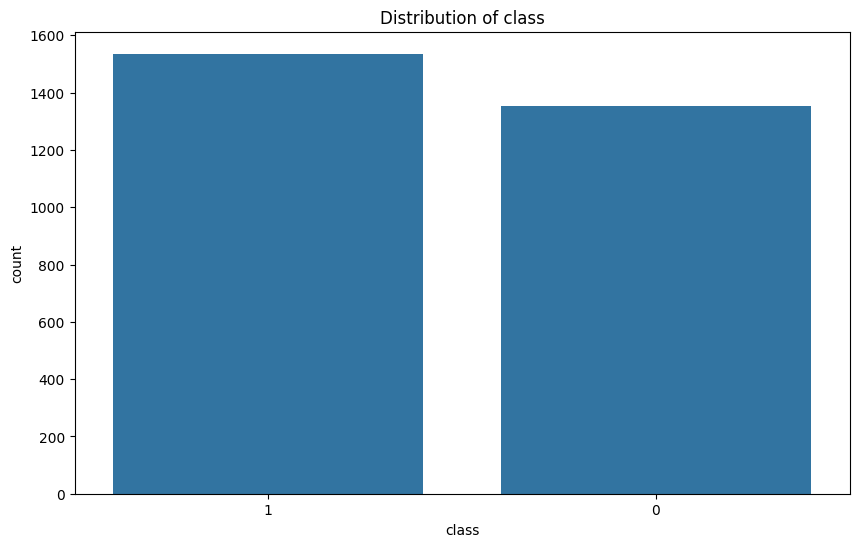

Dataset


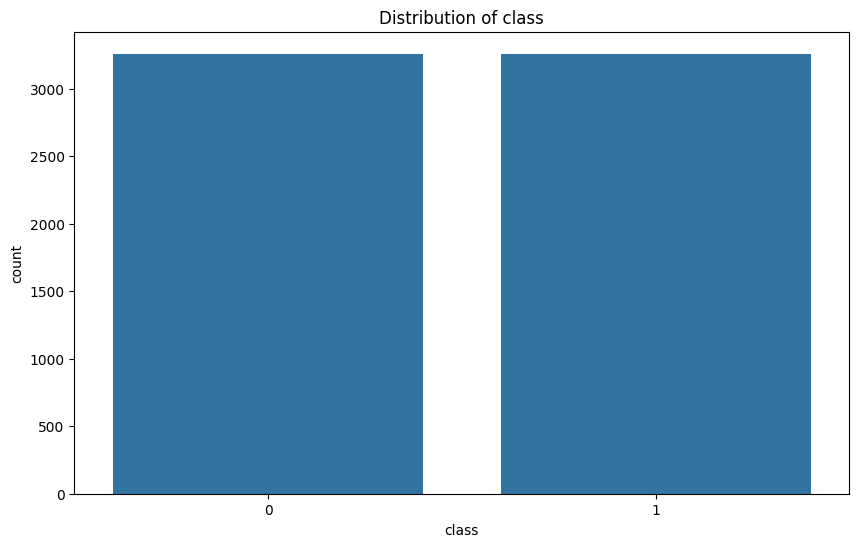

Dataset


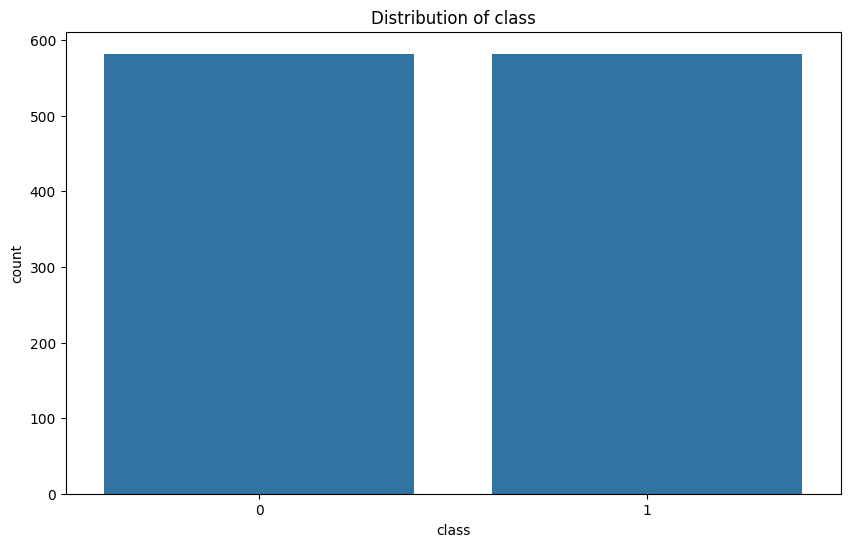

Dataset


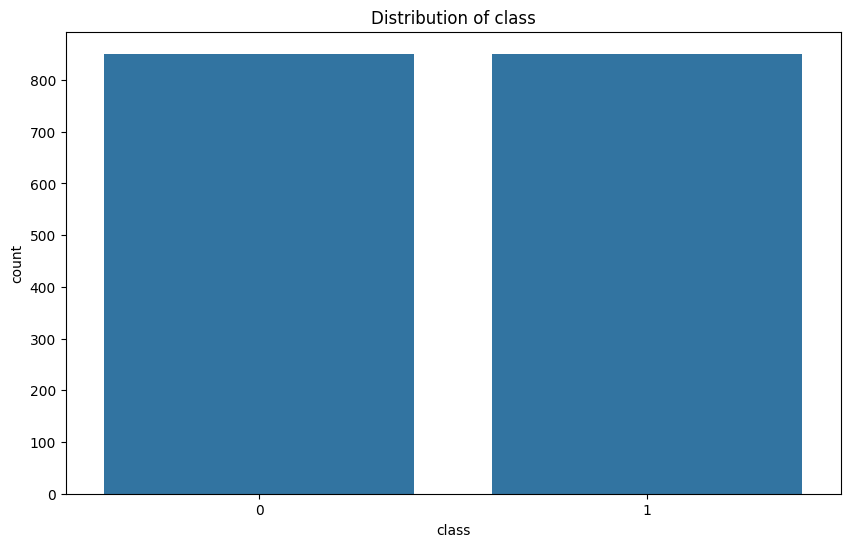

Dataset


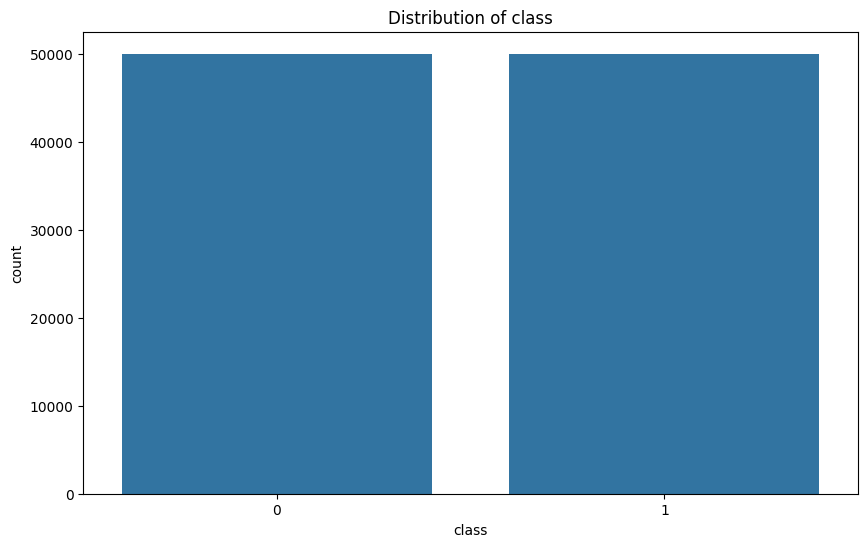

In [5]:
# Iterate through each dataset and apply the functions
for df, label_col, text_col in datasets:
    print("Dataset")
    # Plot categorical distribution
    plot_categorical_distribution(df, label_col)

In [6]:
# Iterate through each dataset and apply the functions
for df, label_col, text_col in datasets:

    show_unique_values(df,label_col)


Unique values in column: class
[0 1]

Unique values in column: class
[0 1]

Unique values in column: class
[0 1]

Unique values in column: class
[0 1]

Unique values in column: class
[0 1]


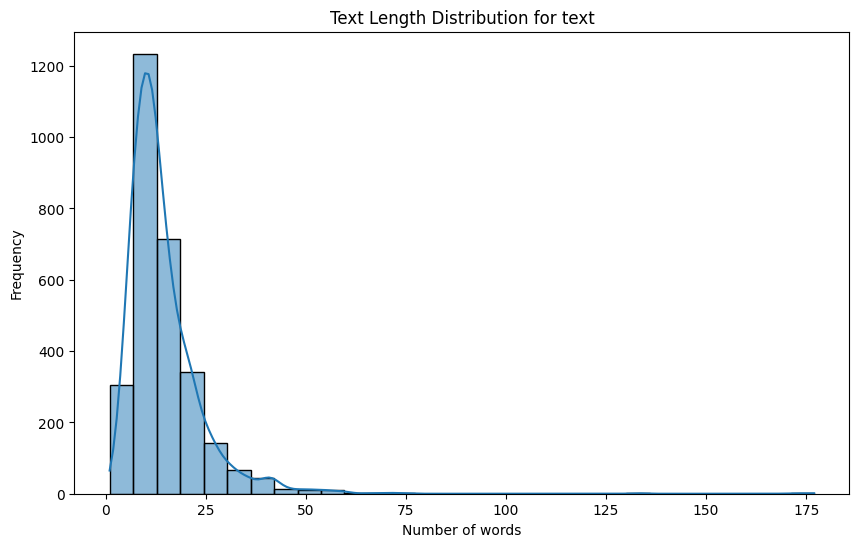

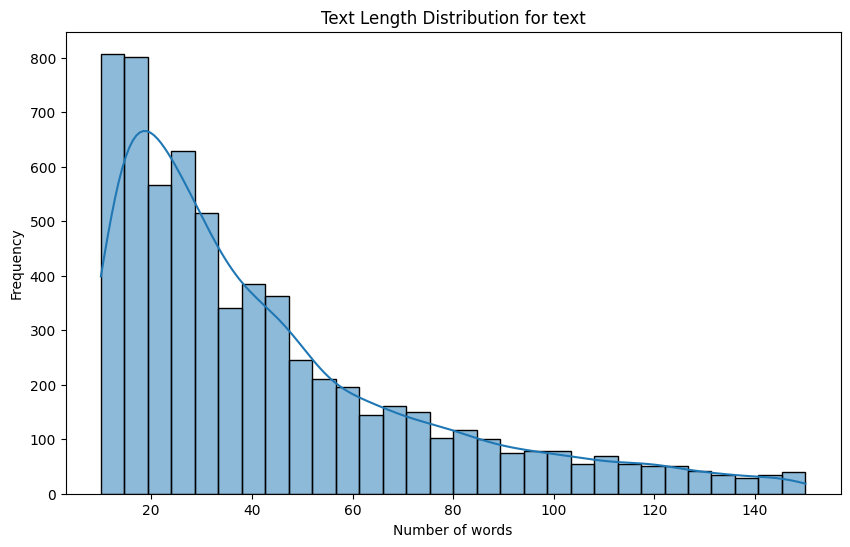

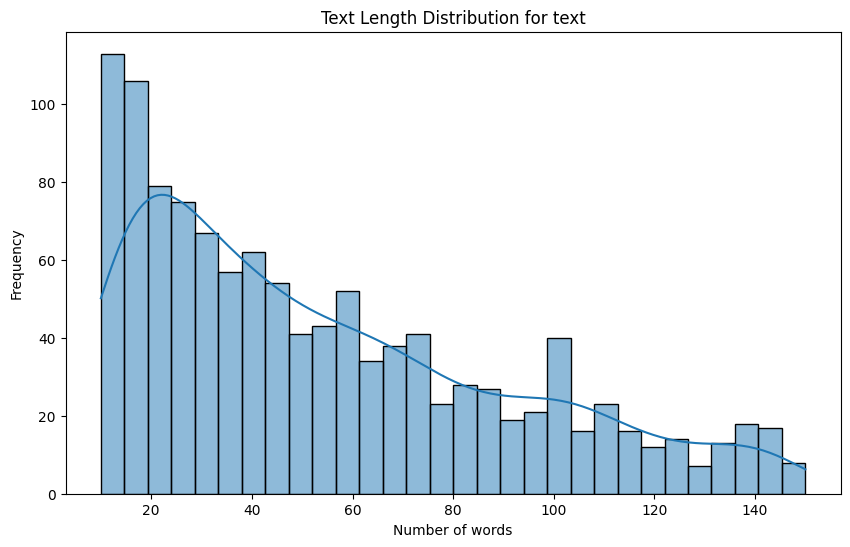

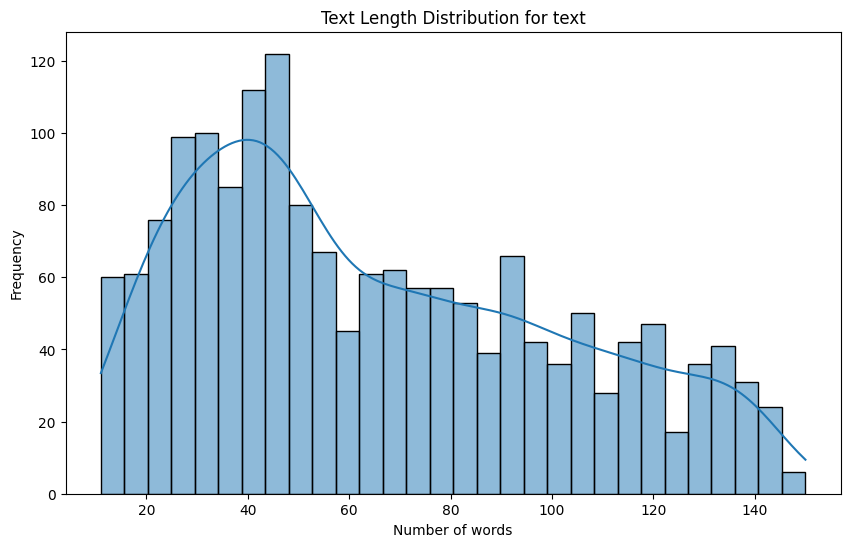

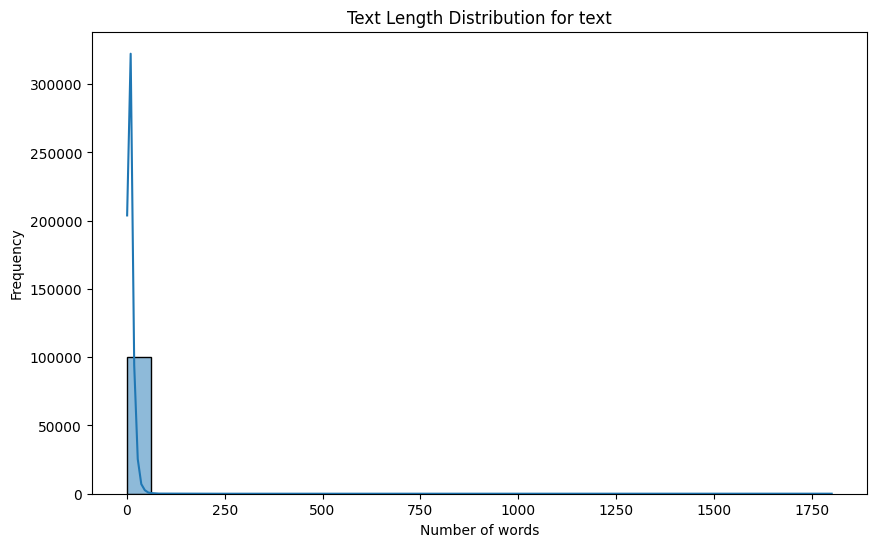

In [7]:
# Iterate through each dataset and apply the functions
for df, label_col, text_col in datasets:

    plot_text_length_distribution(df, text_col)

In [8]:
# Iterate through each dataset and apply the functions
for df, label_col, text_col in datasets:
    # Show random text samples
    show_column_samples(df, text_col)


Sample texts from column: text
["Not that clear since i'm frequent at this subreddit so my IQ is higher than everyone else that thinks different and I didn't catch it."
 "It's shit like this that makes me think they must be no older than 22 and that's being generous."
 '@USER well planned well executed'
 'An example is all the racist, sexist, and hateful things you just said in your reply.'
 "I don't think that true facts like these can piss anyone off"]

Sample texts from column: text
['But we certainly have the right to evict such persons.   But then, regardless, the embryo is not a person.'
 "Actually, I don't remember that they did. What they did take bets on was that AIG would be able to find enough stupid people who would buy into their ignorant and scientifically illiterate tripe. As I recall, most who were actually aware of how stupid creationists can be bet that they would be able to do so. So now, besides their other so called 'peer reviewed' magazine, they want to pretend t

In [9]:
i=0
for df, label_col, text_col in datasets:
    i+=1
    total_rows = len(df)
    class_0_rows = len(df[df[label_col] == 0])
    class_1_rows = len(df[df[label_col] == 1])
    avg_text_length = df[text_col].dropna().apply(lambda x: len(str(x).split())).mean()  # Average text length

    print(f"Dataset: {i}")
    print(f"Total number of rows: {total_rows}")
    print(f"Number of rows for class 0: {class_0_rows *100 /total_rows :.2f}%")
    print(f"Number of rows for class 1: {class_1_rows *100 /total_rows :.2f}%")
    print(f"Average length of text: {avg_text_length:.2f} words")
    print("-" * 50)


Dataset: 1
Total number of rows: 2889
Number of rows for class 0: 46.83%
Number of rows for class 1: 53.17%
Average length of text: 14.47 words
--------------------------------------------------
Dataset: 2
Total number of rows: 6520
Number of rows for class 0: 50.00%
Number of rows for class 1: 50.00%
Average length of text: 43.34 words
--------------------------------------------------
Dataset: 3
Total number of rows: 1164
Number of rows for class 0: 50.00%
Number of rows for class 1: 50.00%
Average length of text: 54.23 words
--------------------------------------------------
Dataset: 4
Total number of rows: 1702
Number of rows for class 0: 50.00%
Number of rows for class 1: 50.00%
Average length of text: 65.38 words
--------------------------------------------------
Dataset: 5
Total number of rows: 100000
Number of rows for class 0: 50.00%
Number of rows for class 1: 50.00%
Average length of text: 10.26 words
--------------------------------------------------


### Data Preprocessing

In [2]:
import re
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from torch.nn.utils.rnn import pad_sequence
import emoji

# Download necessary resources for stopwords and tokenization
nltk.download('stopwords')
nltk.download('punkt')

# Initialize stopwords
stop_words = set(stopwords.words('english'))

# Example datasets (assuming you already have these in your workspace)
datasets = [
    (df_DWAEF_sarc, 'class', 'text'),
    (df_GEN_sarc, 'class', 'text'),
    (df_HYP_sarc, 'class', 'text'),
    (df_RQ_sarc, 'class', 'text'),
    (df_reddit_sarc, 'class', 'text')
]


# Preprocess the text column
def preprocess_text(text):
    if pd.isnull(text):  # Handle NaN values
        return ""

    # Ensure text is a string
    text = str(text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove mentions (Twitter-like @mentions)
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags (if applicable)
    text = re.sub(r'#\w+', '', text)

    # Remove punctuation except for exclamation marks, question marks, and emojis
    text = re.sub(r'[^\w\s!?]', '', text)

    # Convert emojis to words
    text = emoji.demojize(text, delimiters=("", ""))

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Join tokens back into a string
    preprocessed_text = ' '.join(filtered_tokens)

    return preprocessed_text

# Prepare data for training
def prepare_data(datasets):
    texts, labels = [], []

    # Iterate through datasets and collect text and labels
    for df, label_col, text_col in datasets:
        # Preprocess text for the 'text' column
        df['text'] = df[text_col].apply(preprocess_text)
        texts += df['text'].tolist()
        labels += df[label_col].tolist()

    return texts, labels

texts, labels = prepare_data(datasets)

# Balance Reddit dataset if needed
reddit_texts = texts[-100000:]  # Assuming the last dataset is Reddit
reddit_labels = labels[-100000:]
texts, labels = texts[:-100000], labels[:-100000]  # Exclude Reddit data

# Downsample Reddit data
downsampled_texts, downsampled_labels = resample(
    reddit_texts, reddit_labels, n_samples=int(0.4 * len(reddit_texts)), random_state=42)

# Merge Reddit back with the smaller datasets
texts += downsampled_texts
labels += downsampled_labels


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Vocab and Dataset Building

In [ ]:
# Tokenizer and build vocabulary
def build_vocab(tokenized_texts):
    vocab = set()
    for sentence in tokenized_texts:
        vocab.update(sentence.split())  # Split by space to get words
    return {word: idx for idx, word in enumerate(vocab)}

vocab = build_vocab(texts)
vocab_size = len(vocab)

def encode_texts(tokenized_texts, vocab):
    encoded_texts = [[vocab[word] for word in sentence.split() if word in vocab] for sentence in tokenized_texts]
    return [torch.tensor(seq) for seq in encoded_texts]

encoded_texts = encode_texts(texts, vocab)
labels = torch.tensor(labels)

# Padding sequences
max_len = 60  # Example truncation length based on your average lengths
encoded_texts = [seq[:max_len] if len(seq) > max_len else seq for seq in encoded_texts]
padded_texts = pad_sequence(encoded_texts, batch_first=True, padding_value=0)

# Final dataset
class SarcasmDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

dataset = SarcasmDataset(padded_texts, labels)

# Optional: Create a DataLoader for batching
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

### Model Implementation

In [4]:
class SarcasmDetector(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim, num_layers, dropout_prob=0.5):
        super(SarcasmDetector, self).__init__()

        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embed_dim)

        # Bidirectional LSTM with dropout
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers=num_layers,
                            batch_first=True, dropout=dropout_prob,
                            bidirectional=True)
        
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim * 2, hidden_dim)
        
        # Activation, dropout, and final output layer
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)
        self.output = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, (hidden, cell) = self.lstm(embedded)

        final_hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)

        out = self.fc(final_hidden)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.output(out)
        out = self.sigmoid(out)

        return out   
    

### Model Training & Evaluation

In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# 5-Fold Cross-Validation
k_folds = 10
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Placeholder for storing accuracy per fold
results = {}

for fold, (train_idx, val_idx) in enumerate(skf.split(padded_texts, labels)):
    print(f'FOLD {fold + 1}')
    print('--------------------------------')

    # Create DataLoader for train and validation sets
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_idx)
    val_subsampler = torch.utils.data.SubsetRandomSampler(val_idx)

    train_loader = DataLoader(dataset, batch_size=32, sampler=train_subsampler)
    val_loader = DataLoader(dataset, batch_size=32, sampler=val_subsampler)

    # Initialize model, loss, and optimizer
    model = SarcasmDetector(vocab_size=vocab_size, embed_dim=100, hidden_dim=128, output_dim=1, num_layers=2).to(device)  # Ensure the model is on GPU
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001,weight_decay=1e-5)

    # Training and validation loop
    num_epochs = 30
    for epoch in range(num_epochs):
        model.train()
        for texts, labels in train_loader:
            texts, labels = texts.to(device), labels.to(device)  # Move data to GPU
            optimizer.zero_grad()
            output = model(texts)
            loss = criterion(output.squeeze(), labels.float())
            loss.backward()
            optimizer.step()

        # Validation phase
        model.eval()
        all_labels = []
        all_predictions = []
        
        with torch.no_grad():
            for texts, labels in val_loader:
                texts, labels = texts.to(device), labels.to(device)  # Move data to GPU
                output = model(texts)
                predicted = (output.squeeze() > 0.5).int()
                all_labels.extend(labels.cpu().numpy())  # Store true labels
                all_predictions.extend(predicted.cpu().numpy())  # Store predicted labels

        # Store accuracy for each fold
        accuracy = 100.0 * np.sum(np.array(all_predictions) == np.array(all_labels)) / len(all_labels)
        print(f'Epoch [{epoch + 1}/{num_epochs}], Accuracy: {accuracy:.2f}%')

    # Calculate precision, recall, and F1 score after each fold
    precision = precision_score(all_labels, all_predictions)
    recall = recall_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions)

    # Store results
    results[fold] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1}

# After all folds:
print(f'K-Fold Cross Validation Results for {k_folds} Folds:')
for fold in range(k_folds):
    print(f'Fold {fold + 1}: Accuracy: {results[fold]["accuracy"]:.2f}%, Precision: {results[fold]["precision"]:.2f}, Recall: {results[fold]["recall"]:.2f}, F1 Score: {results[fold]["f1_score"]:.2f}')


FOLD 1
--------------------------------
Epoch [1/30], Accuracy: 64.35%
Epoch [2/30], Accuracy: 67.27%
Epoch [3/30], Accuracy: 68.90%
Epoch [4/30], Accuracy: 69.72%
Epoch [5/30], Accuracy: 70.43%
Epoch [6/30], Accuracy: 70.31%
Epoch [7/30], Accuracy: 71.02%
Epoch [8/30], Accuracy: 70.35%
Epoch [9/30], Accuracy: 70.60%
Epoch [10/30], Accuracy: 70.81%
Epoch [11/30], Accuracy: 70.66%
Epoch [12/30], Accuracy: 70.62%
Epoch [13/30], Accuracy: 70.73%
Epoch [14/30], Accuracy: 70.68%
Epoch [15/30], Accuracy: 70.35%
Epoch [16/30], Accuracy: 70.07%
Epoch [17/30], Accuracy: 70.70%
Epoch [18/30], Accuracy: 70.64%
Epoch [19/30], Accuracy: 70.89%
Epoch [20/30], Accuracy: 70.70%
Epoch [21/30], Accuracy: 70.14%
Epoch [22/30], Accuracy: 70.54%
Epoch [23/30], Accuracy: 71.58%
Epoch [24/30], Accuracy: 70.68%
Epoch [25/30], Accuracy: 70.81%
Epoch [26/30], Accuracy: 70.85%
Epoch [27/30], Accuracy: 71.54%
Epoch [28/30], Accuracy: 70.33%
Epoch [29/30], Accuracy: 70.56%
Epoch [30/30], Accuracy: 70.33%
FOLD 2
--

In [6]:
def calculate_average_metrics(results, k_folds):
    total_accuracy = 0.0
    total_precision = 0.0
    total_recall = 0.0
    total_f1 = 0.0

    for fold in range(k_folds):
        total_accuracy += results[fold]['accuracy']
        total_precision += results[fold]['precision']
        total_recall += results[fold]['recall']
        total_f1 += results[fold]['f1_score']

    avg_accuracy = total_accuracy / k_folds
    avg_precision = total_precision / k_folds
    avg_recall = total_recall / k_folds
    avg_f1 = total_f1 / k_folds

    return {
        'average_accuracy': avg_accuracy,
        'average_precision': avg_precision,
        'average_recall': avg_recall,
        'average_f1_score': avg_f1
    }


average_metrics = calculate_average_metrics(results, k_folds)
print(f"Average Accuracy: {average_metrics['average_accuracy']:.2f}%")
print(f"Average Precision: {average_metrics['average_precision']:.2f},Average Recall: {average_metrics['average_recall']:.2f} ,Average F1 Score: {average_metrics['average_f1_score']:.2f}")


Average Accuracy: 70.97%
Average Precision: 0.72,Average Recall: 0.69 ,Average F1 Score: 0.70
